<a href="https://colab.research.google.com/github/OwenRoque/EDA-Parcial-III/blob/master/Parcial_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init & Imports

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/EDA - PARCIAL III')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Eliminación de Columnas Innecesarias



In [57]:
excel = 'covid_DB.xlsx'
df = pd.read_excel(excel)
cols = ['Patient age quantile', 'SARS-Cov-2 exam result', 'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
        'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes', 'Basophils', 'Eosinophils', 'Monocytes', 'Proteina C reativa mg/dL']
df = df[cols]
df_c = df.copy()
df.dtypes

Patient age quantile                                  int64
SARS-Cov-2 exam result                               object
Hematocrit                                          float64
Hemoglobin                                          float64
Platelets                                           float64
Mean platelet volume                                float64
Mean corpuscular hemoglobin concentration (MCHC)    float64
Leukocytes                                          float64
Basophils                                           float64
Eosinophils                                         float64
Monocytes                                           float64
Proteina C reativa mg/dL                            float64
dtype: object

## Codificación

In [6]:
def encodage(df):
    code = {'negative': 0,
            'positive': 1}

    for col in df.select_dtypes('object').columns:
        df[col] = df[col].map(code)

    return df

In [7]:
def imputation(df):
  return df.dropna(axis=0)

In [8]:
def preprocessing(df):
  df = encodage(df)
  df = imputation(df)
  # X = df.drop('SARS-Cov-2 exam result', axis=1)
  # y = df['SARS-Cov-2 exam result']
  # print(y.value_counts())
  return df # X, y

# Análisis General del Dataset
**Valores sanguineos** de los pacientes

<Axes: >

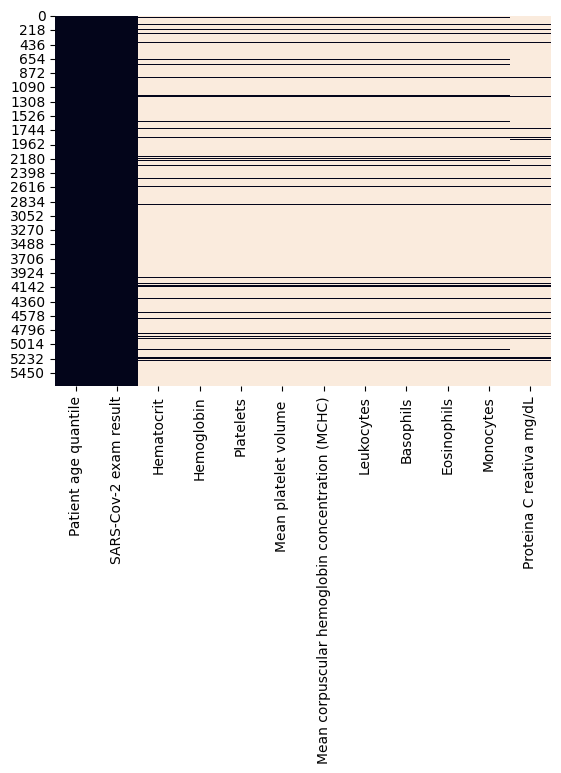

In [9]:
sns.heatmap(df.isna(), cbar=False)

Hay bastante data vacía en el dataset
*   Entre 89% a 91% de las columnas se encuentran vacías
*   Aprox 10% contiene información



In [14]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient age quantile                                0.000000
SARS-Cov-2 exam result                              0.000000
Hematocrit                                          0.893161
Hemoglobin                                          0.893161
Platelets                                           0.893338
Mean corpuscular hemoglobin concentration (MCHC)    0.893338
Leukocytes                                          0.893338
Basophils                                           0.893338
Eosinophils                                         0.893338
Monocytes                                           0.893515
Mean platelet volume                                0.893870
Proteina C reativa mg/dL                            0.910347
dtype: float64

## Impacto de NaN en la exploración de datos

In [15]:
df.count()

Patient age quantile                                5644
SARS-Cov-2 exam result                              5644
Hematocrit                                           603
Hemoglobin                                           603
Platelets                                            602
Mean platelet volume                                 599
Mean corpuscular hemoglobin concentration (MCHC)     602
Leukocytes                                           602
Basophils                                            602
Eosinophils                                          602
Monocytes                                            601
Proteina C reativa mg/dL                             506
dtype: int64

In [16]:
df.dropna().count()

Patient age quantile                                499
SARS-Cov-2 exam result                              499
Hematocrit                                          499
Hemoglobin                                          499
Platelets                                           499
Mean platelet volume                                499
Mean corpuscular hemoglobin concentration (MCHC)    499
Leukocytes                                          499
Basophils                                           499
Eosinophils                                         499
Monocytes                                           499
Proteina C reativa mg/dL                            499
dtype: int64

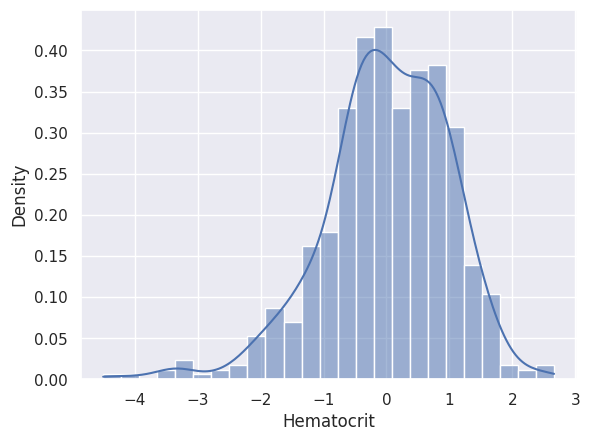

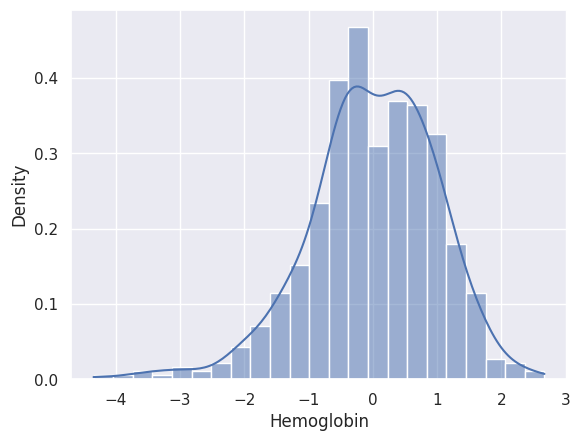

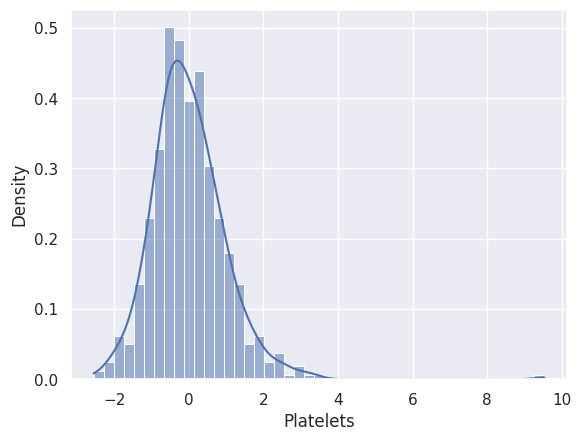

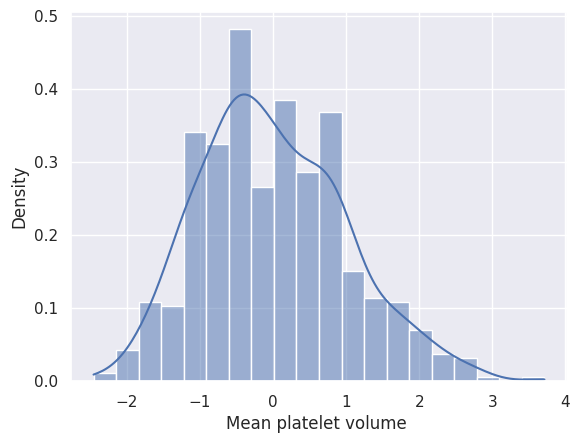

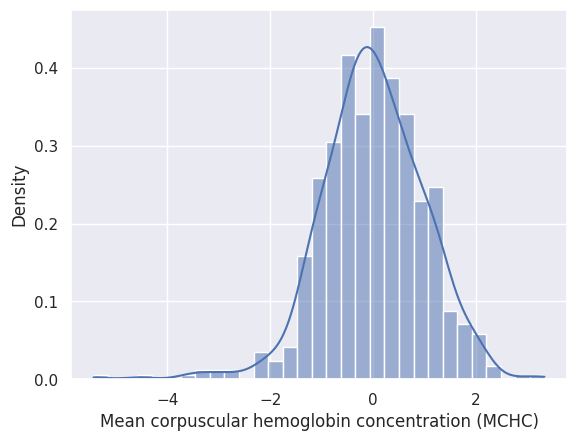

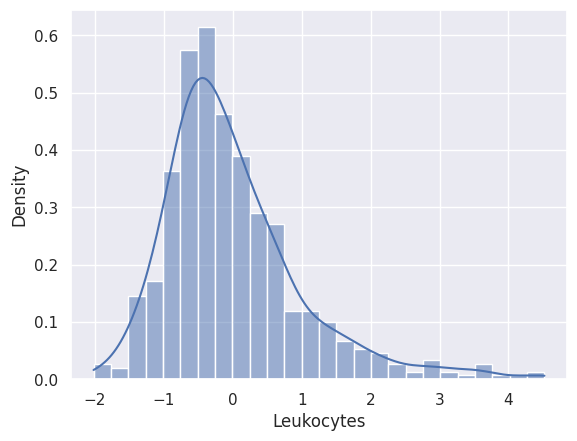

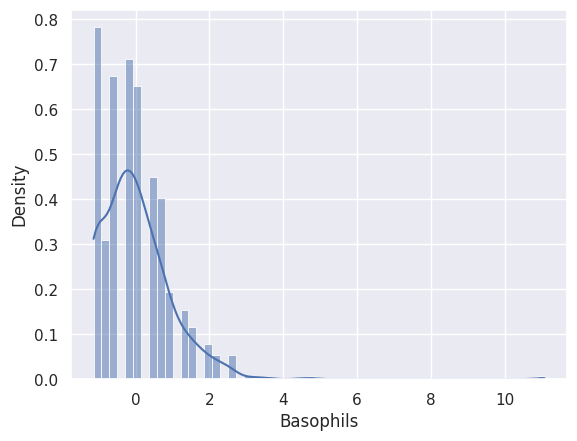

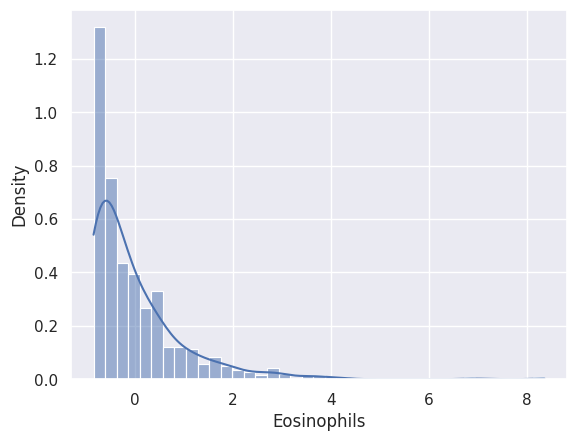

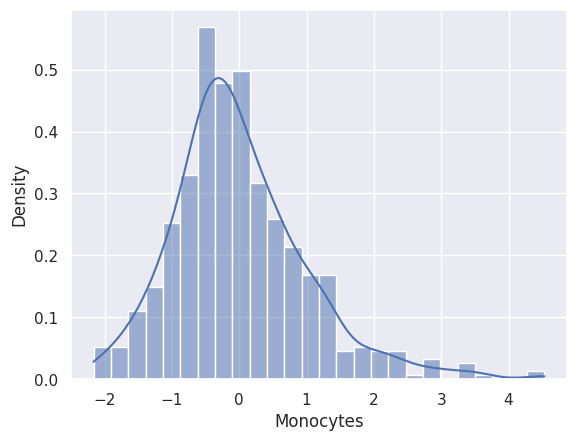

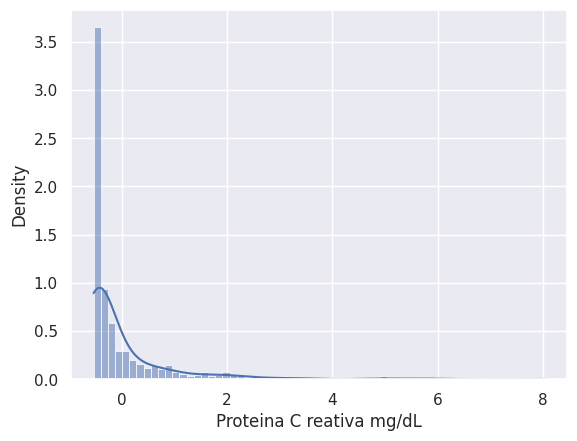

In [17]:
sns.set_theme()
for col in df.select_dtypes('float'):
  plt.figure()
  sns.histplot(df[col], kde=True, stat="density")

In [18]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

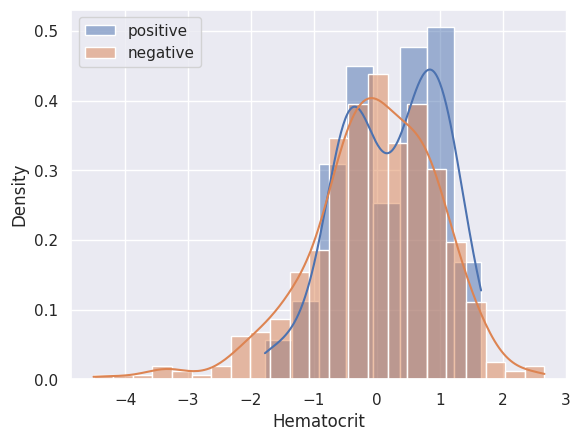

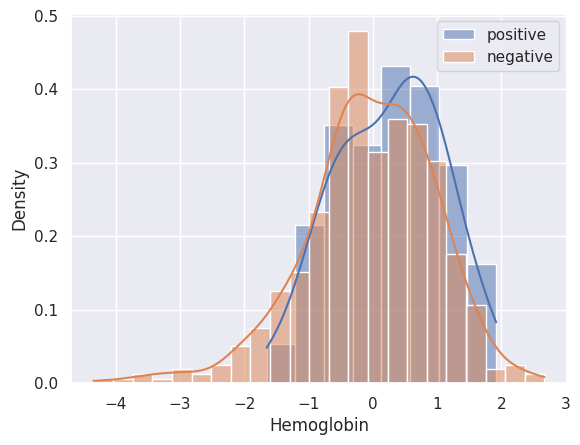

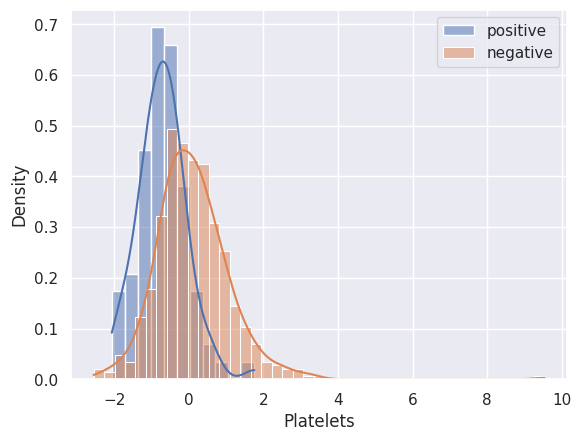

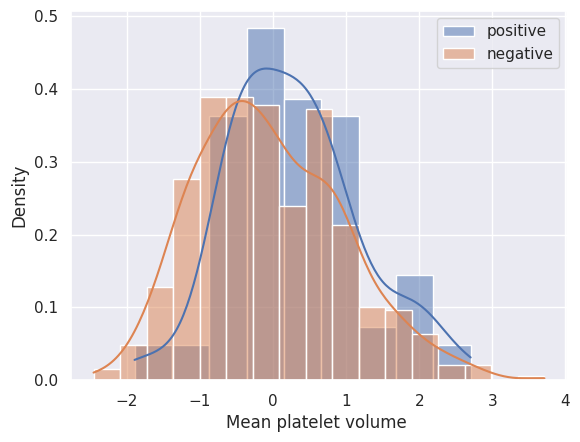

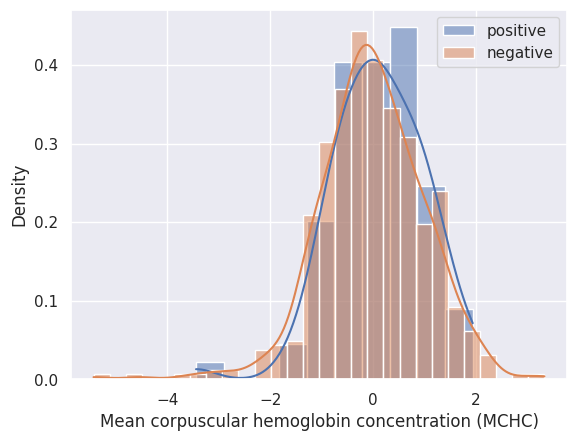

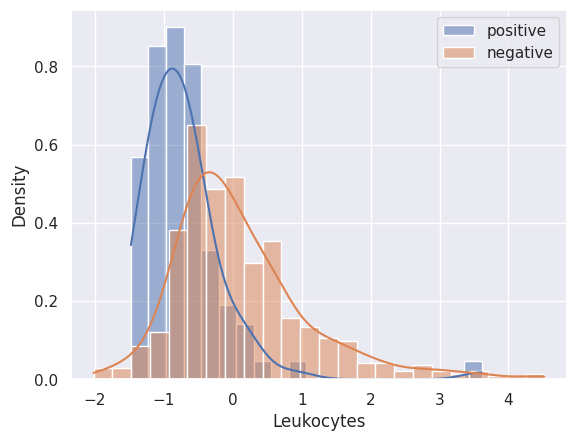

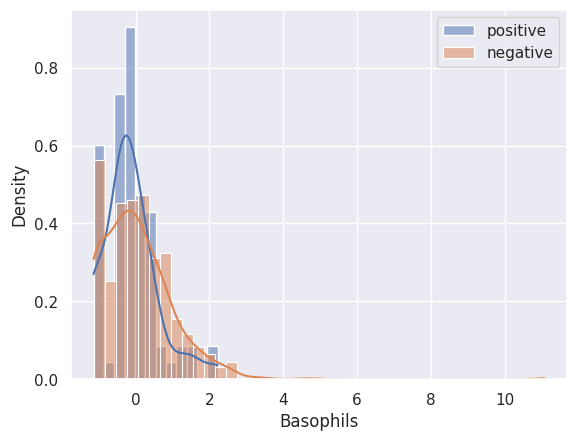

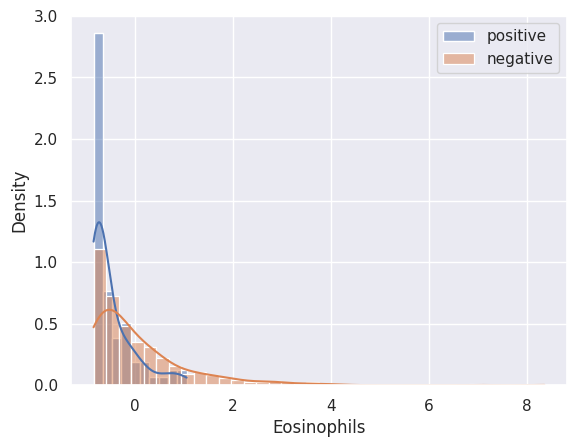

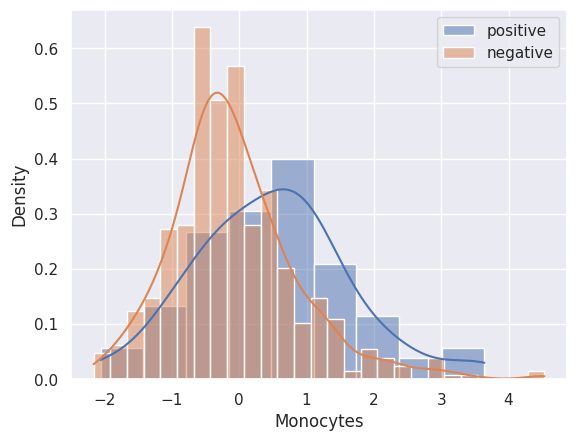

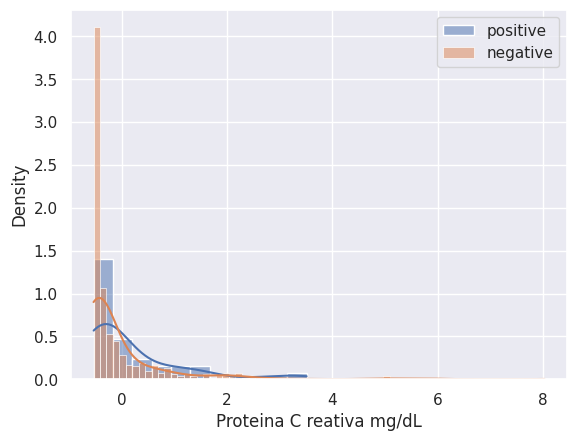

In [19]:
for col in df.select_dtypes('float'):
  plt.figure()
  sns.histplot(positive_df[col], kde=True, stat="density", label='positive')
  sns.histplot(negative_df[col], kde=True, stat="density", label='negative')
  plt.legend()

*   La distribución normal de Platelets, Leukocytes, Monocytes varía entre los pacientes sanos / enfermos
*   Hipótesis a comprobar



# Preprocesamiento

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Normalizar df luego del preprocesamiento

In [65]:
df_prep = preprocessing(df_c)
df_prep.reset_index(drop=True, inplace=True)
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_prep)

In [91]:
df_prep[df_prep['SARS-Cov-2 exam result'] == 0]

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Eosinophils,Monocytes,Proteina C reativa mg/dL
0,17,0,0.236515,-0.022340,-0.517413,0.010677,-0.950790,-0.094610,-0.223767,1.482158,0.357547,-0.147895
1,1,0,-1.571682,-0.774212,1.429667,-1.672222,3.331071,0.364550,-0.223767,1.018625,0.068652,-0.286986
2,11,0,0.991838,0.792188,0.072992,-0.550290,-0.452899,-0.211488,-0.834685,-0.709090,-0.220244,-0.487674
3,13,0,1.014726,0.854844,-0.178244,0.796029,-0.353319,-0.075131,2.525365,0.217977,0.068652,-0.434025
4,14,0,0.740064,0.854844,0.361914,-0.550290,0.642463,0.105751,-0.529226,-0.371974,0.121178,-0.529401
...,...,...,...,...,...,...,...,...,...,...,...,...
492,19,0,-1.731902,-1.588740,-0.856582,-0.101517,0.144572,-1.928470,1.608988,0.344395,-1.585931,-0.463830
494,19,0,0.190738,0.165628,-0.102873,0.908221,-0.054585,-0.328365,-0.834685,0.892207,1.066653,3.627427
495,19,0,-0.289922,-0.523588,0.663397,-0.774677,-1.050367,1.569499,0.081693,-0.540532,1.670707,5.733660
496,15,0,0.717175,1.105468,-0.492289,-0.213711,1.538664,-0.550988,-0.223767,-0.709090,0.909074,0.561468


In [76]:
df_prep.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Eosinophils,Monocytes,Proteina C reativa mg/dL
0,17,0,0.236515,-0.022340,-0.517413,0.010677,-0.950790,-0.094610,-0.223767,1.482158,0.357547,-0.147895
1,1,0,-1.571682,-0.774212,1.429667,-1.672222,3.331071,0.364550,-0.223767,1.018625,0.068652,-0.286986
2,11,0,0.991838,0.792188,0.072992,-0.550290,-0.452899,-0.211488,-0.834685,-0.709090,-0.220244,-0.487674
3,13,0,1.014726,0.854844,-0.178244,0.796029,-0.353319,-0.075131,2.525365,0.217977,0.068652,-0.434025
4,14,0,0.740064,0.854844,0.361914,-0.550290,0.642463,0.105751,-0.529226,-0.371974,0.121178,-0.529401


In [80]:
df_normalized

array([[ 0.98790993, -0.39381797,  0.2214487 , ...,  1.46416891,
         0.38753719, -0.14816796],
       [-1.82201985, -0.39381797, -1.54856827, ...,  1.00794599,
         0.09513983, -0.28653566],
       [-0.06581374, -0.39381797,  0.96082258, ..., -0.69252127,
        -0.19725778, -0.48618051],
       ...,
       [ 0.63666871, -0.39381797,  0.69195909, ..., -0.69252127,
         0.94575073,  0.55750747],
       [ 0.98790993, -0.39381797, -3.18415316, ..., -0.56809686,
         1.42421937,  0.60494786],
       [ 1.33915115,  2.53924422,  0.66955414, ..., -0.81694574,
         0.60019001, -0.50199396]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_normalized, df_prep['SARS-Cov-2 exam result'], test_size=0.2, random_state=42)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = knn_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        81
           1       1.00      0.95      0.97        19

    accuracy                           0.99       100
   macro avg       0.99      0.97      0.98       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix:
 [[81  0]
 [ 1 18]]


In [89]:
from sklearn.neighbors import KDTree

tree = KDTree(df_normalized)

In [90]:
def predict_test_result(point):
  # Nuevo punto para el cual deseas encontrar vecinos cercanos
  print(point)
  normalized_point = scaler.transform(point.reshape(1, -1))

  # Encuentra los vecinos más cercanos
  # Es mejor usar un valor de k impar para evitar empates
  k = 5
  # KNN de KDTree
  distancias, indices = tree.query(normalized_point, k=k)

  # Puedes acceder a los datos de los vecinos más cercanos en el DataFrame original
  vecinos_cercanos = df_prep.iloc[indices.flatten()]
  print(vecinos_cercanos)

  # Determina la clase mayoritaria
  etiquetas_vecinos = df_prep['SARS-Cov-2 exam result'].iloc[indices.flatten()]
  clase_mayoritaria = etiquetas_vecinos.mode().values[0]

  print(f"El punto seleccionado se clasifica como: {clase_mayoritaria}")

In [94]:
punto_pos1 = df_prep.iloc[114]
predict_test_result(punto_pos1.values)

[15.          1.         -0.49591911 -0.39827582 -0.71840197 -0.43809694
  0.24414857 -0.82091892 -1.14014375 -0.66695017 -0.45661277 -0.24724552]
     Patient age quantile  SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
114                    15                       1   -0.495919   -0.398276   
469                    17                       1   -0.587474   -0.460932   
486                    14                       1   -0.312811    0.040316   
463                    16                       1   -0.427254   -0.210308   
431                    15                       1   -0.244145   -0.210308   

     Platelets  Mean platelet volume   \
114  -0.718402              -0.438097   
469  -0.793773               0.347255   
486  -0.592784               0.571643   
463  -1.271122              -0.325903   
431  -0.567660               0.683835   

     Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
114                                          0.244149   -0.8209

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [95]:
punto_pos2 = df_prep.iloc[498]
predict_test_result(punto_pos1.values)

[15.          1.         -0.49591911 -0.39827582 -0.71840197 -0.43809694
  0.24414857 -0.82091892 -1.14014375 -0.66695017 -0.45661277 -0.24724552]
     Patient age quantile  SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
114                    15                       1   -0.495919   -0.398276   
469                    17                       1   -0.587474   -0.460932   
486                    14                       1   -0.312811    0.040316   
463                    16                       1   -0.427254   -0.210308   
431                    15                       1   -0.244145   -0.210308   

     Platelets  Mean platelet volume   \
114  -0.718402              -0.438097   
469  -0.793773               0.347255   
486  -0.592784               0.571643   
463  -1.271122              -0.325903   
431  -0.567660               0.683835   

     Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
114                                          0.244149   -0.8209

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [96]:
punto_neg1 = df_prep.iloc[497]
predict_test_result(punto_neg1.values)

[17.          0.         -3.24254799 -2.77920341 -1.7735939  -0.55028951
  1.5386641  -1.73367476 -1.14014375 -0.5826714   1.38181186  0.60915661]
     Patient age quantile  SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
497                    17                       0   -3.242548   -2.779203   
189                    16                       0   -0.679027   -0.711556   
179                    12                       0   -1.663236   -1.526084   
206                    13                       0   -2.212562   -2.215300   
313                    10                       0   -1.503017   -1.651396   

     Platelets  Mean platelet volume   \
497  -1.773594              -0.550290   
189  -1.120380               0.010677   
179  -0.894267               0.347255   
206  -0.831458              -0.101517   
313  -0.856582               1.020415   

     Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
497                                          1.538664   -1.7336

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [97]:
punto_neg2 = df_prep.iloc[497]
predict_test_result(punto_neg2.values)

[17.          0.         -3.24254799 -2.77920341 -1.7735939  -0.55028951
  1.5386641  -1.73367476 -1.14014375 -0.5826714   1.38181186  0.60915661]
     Patient age quantile  SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
497                    17                       0   -3.242548   -2.779203   
189                    16                       0   -0.679027   -0.711556   
179                    12                       0   -1.663236   -1.526084   
206                    13                       0   -2.212562   -2.215300   
313                    10                       0   -1.503017   -1.651396   

     Platelets  Mean platelet volume   \
497  -1.773594              -0.550290   
189  -1.120380               0.010677   
179  -0.894267               0.347255   
206  -0.831458              -0.101517   
313  -0.856582               1.020415   

     Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
497                                          1.538664   -1.7336

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
